In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt


2026-02-03 17:38:39.270329: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1770140319.630116      24 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1770140319.723379      24 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1770140320.589516      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770140320.589569      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770140320.589572      24 computation_placer.cc:177] computation placer alr

In [2]:
data_path = "/kaggle/input/plant-village/PlantVillage"

In [3]:
data = tf.keras.preprocessing.image_dataset_from_directory(
   data_path,
   shuffle = True,
   image_size = (256,256),
   batch_size = 32
)

Found 20638 files belonging to 15 classes.


I0000 00:00:1770140367.803835      24 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15511 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [4]:
class_names = data.class_names
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [5]:
len(data)

645

In [6]:
5160*4

20640

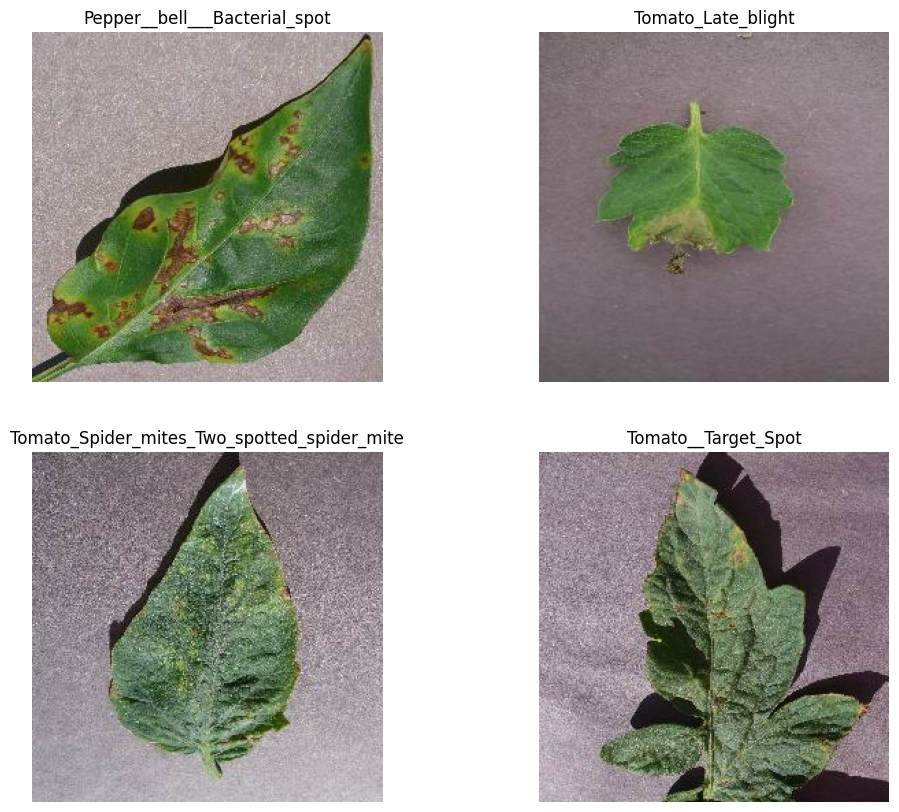

In [7]:
plt.figure(figsize=(12, 10))
for image, label in data.take(1):
    for i in range(4):
        axis = plt.subplot(2,2,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[i].numpy()])
        plt.axis('off')

In [8]:
len(data)

645

In [9]:
len(data)*0.8

516.0

In [10]:
len(data)*0.1

64.5

In [11]:
def train_val_test_split(dataset, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):

    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed=42)

    ds_size = len(dataset)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = dataset.take(train_size)
    val_ds = dataset.skip(train_size).take(val_size)
    test_ds = dataset.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [12]:
train_ds, val_ds, test_ds = train_val_test_split(data)

In [13]:
len(train_ds), len(val_ds), len(test_ds)

(516, 64, 65)

In [14]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(256,256),
    tf.keras.layers.Rescaling(1.0/255)
])

In [15]:
data_augumentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.RandomRotation(0.2),
])

In [16]:
data_augumentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.RandomRotation(0.2),
])

In [17]:
base_model=tf.keras.applications.MobileNetV2(
         input_shape = (256,256,3),
         include_top = False,
         weights = "imagenet",
        # trainable = False
)

base_model.trainable = False #new

/tmp/ipykernel_24/174281775.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model=tf.keras.applications.MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [18]:
from tensorflow.keras import models, layers #new

model = models.Sequential([
    #data_augmentation, #new
    layers.Lambda(tf.keras.applications.mobilenet_v2.preprocess_input),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(15, activation="softmax")
])

In [19]:
#model = tf.keras.Sequential([

    #resize_and_rescale,
    #data_augumentation,
    #tf.keras.layers.Conv2D(32, (3, 3), activation='relu',padding='same',strides=(1, 1),input_shape=(256,256,3)),
    #tf.keras.layers.MaxPooling2D(),

    #tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding='same',strides = (1, 1)),
    #tf.keras.layers.MaxPooling2D(),

   # tf.keras.layers.Conv2D(128, (3, 3), activation='relu',padding='same',strides = (1,1)),
    #tf.keras.layers.MaxPooling2D(),

    #tf.keras.layers.Conv2D(256, (3, 3), activation='relu',padding='same',strides = (1,1)),
    #tf.keras.layers.MaxPooling2D(),

    #tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(32,activation='relu'),
   # tf.keras.layers.Dense(16,activation='relu'),

    #tf.keras.layers.Dense(15,activation='softmax')


#])

#model.summary()


In [20]:

model.compile(
    optimizer = "adam",
    loss = "SparseCategoricalCrossentropy",
    metrics = ["accuracy"]
    
)

In [21]:
history = model.fit(train_ds,epochs=5,batch_size=32,validation_data=val_ds)

Epoch 1/5


I0000 00:00:1770140431.168775      72 service.cc:152] XLA service 0x7a3bb4003640 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1770140431.168820      72 service.cc:160]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1770140432.324168      72 cuda_dnn.cc:529] Loaded cuDNN version 91002
I0000 00:00:1770140440.675376      72 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


516/516 ━━━━━━━━━━━━━━━━━━━━ 107s 75ms/step - accuracy: 0.6235 - loss: 1.2634 - val_accuracy: 0.8999 - val_loss: 0.3616
Epoch 2/5
516/516 ━━━━━━━━━━━━━━━━━━━━ 32s 44ms/step - accuracy: 0.8738 - loss: 0.4094 - val_accuracy: 0.9165 - val_loss: 0.2792
Epoch 3/5
516/516 ━━━━━━━━━━━━━━━━━━━━ 36s 52ms/step - accuracy: 0.8920 - loss: 0.3435 - val_accuracy: 0.9257 - val_loss: 0.2363
Epoch 4/5
516/516 ━━━━━━━━━━━━━━━━━━━━ 32s 43ms/step - accuracy: 0.9120 - loss: 0.2814 - val_accuracy: 0.9326 - val_loss: 0.2125
Epoch 5/5
516/516 ━━━━━━━━━━━━━━━━━━━━ 32s 43ms/step - accuracy: 0.9138 - loss: 0.2667 - val_accuracy: 0.9478 - val_loss: 0.1868


In [22]:
loss,accuracy = model.evaluate(test_ds)
print(f'Loss : {loss}')
print(f'Accuracy : {accuracy*100:.2f}%')

65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9581 - loss: 0.1665
Loss : 0.18325814604759216
Accuracy : 94.86%


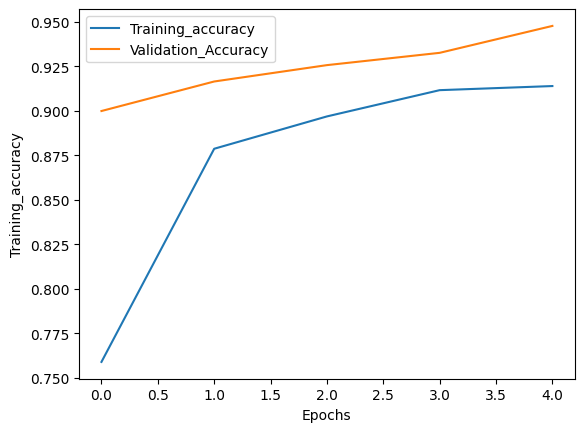

In [23]:
plt.plot(history.history['accuracy'],label = 'Training_accuracy')
plt.plot(history.history['val_accuracy'],label = 'Validation_Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Training_accuracy')
plt.legend()
plt.show()

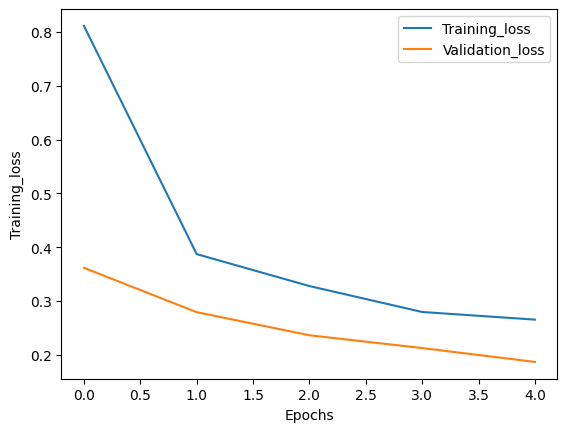

In [24]:
plt.plot(history.history['loss'],label = 'Training_loss')
plt.plot(history.history['val_loss'],label = 'Validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Training_loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


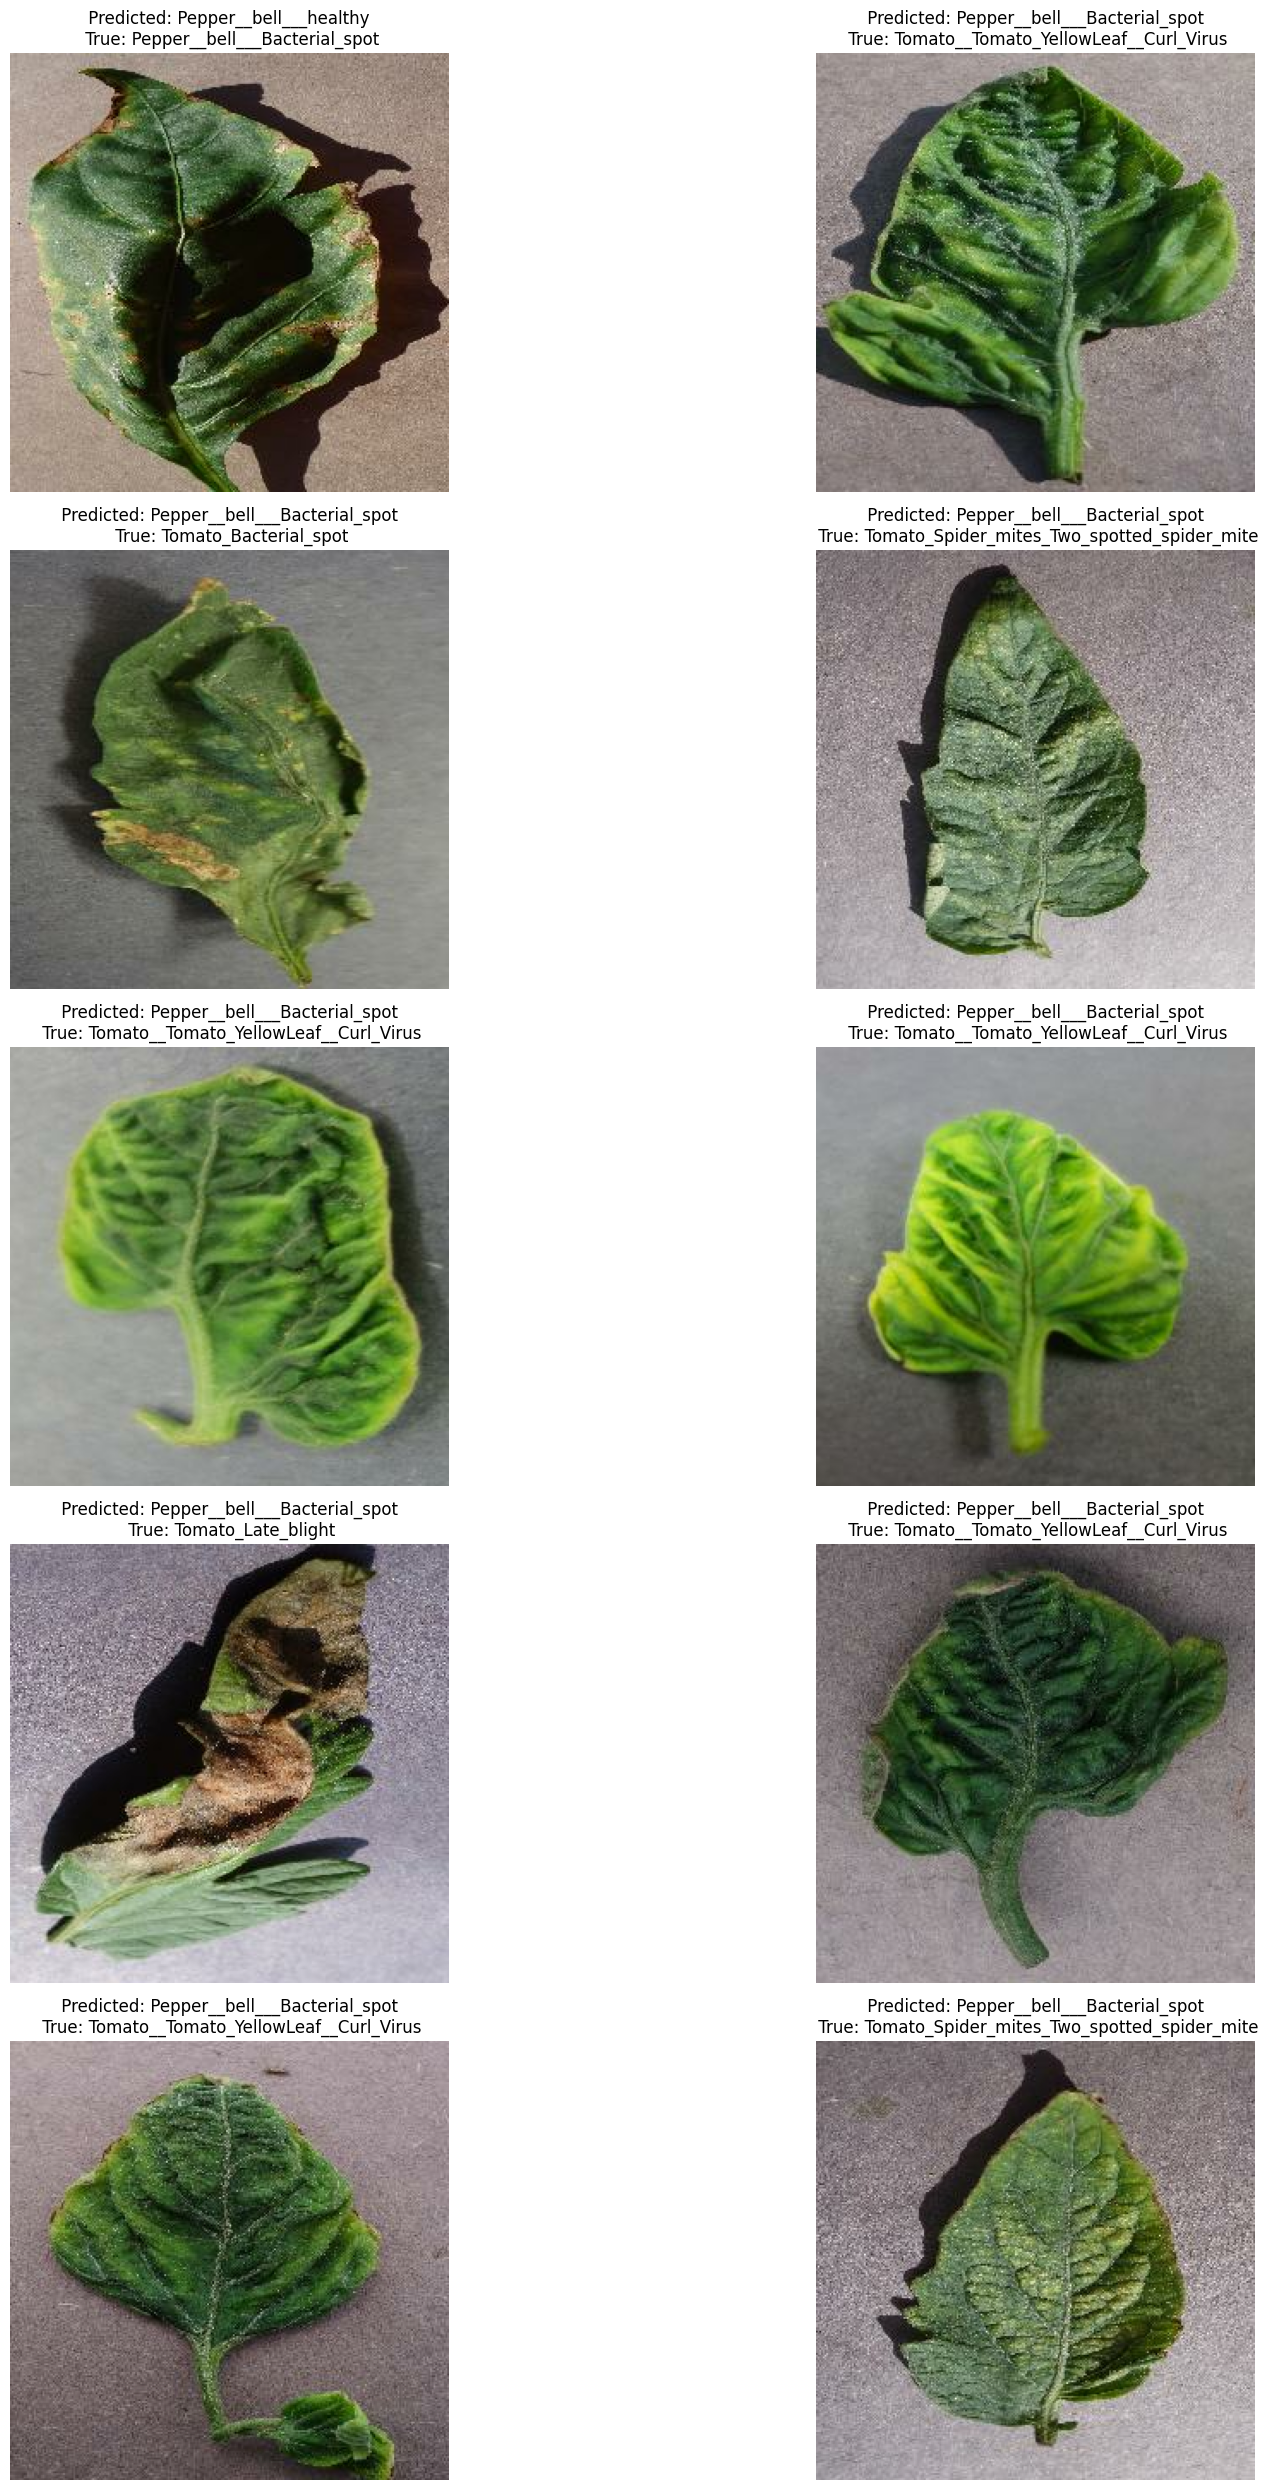

In [25]:
plt.figure(figsize=(20, 25))

for images,labels in test_ds.take(1):  
    predictions = model.predict(images)
    predicted_labels = (predictions > 0.5).astype("int32").flatten()
    true_labels = labels.numpy()

    for i in range(min(len(images), 10)):
        plt.subplot(5, 2, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(f' Predicted: {class_names[predicted_labels[i]]} \n True: {class_names[true_labels[i]]}')
        plt.axis('off')
        
plt.tight_layout()
plt.show()